In [1]:
import cv2

import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Reshape, Conv2D, InputLayer, Dense
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.regularizers import l2

from Model import TrainableModel
from getABSDData import getABSDDataMask


from model import segnet

model = segnet(input_shape=(768, 768, 3), n_labels=1,
                            kernel=3, pool_size=(2, 2), output_mode="softmax")

Using TensorFlow backend.


Done building decoder..


In [6]:
image_converter = lambda x: x/255

n_training_images = 16
training, dev, _ = getABSDDataMask(n_training_images, image_converter=image_converter, remove_nan=True, reduced_size=100)
# training.image_file_names = training.image_file_names[:n_training_images]
# training.labels = training.labels[:n_training_images]
# training.n_images = n_training_images
print(len(training))
callbacks = []
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# hst = model.fit_generator(training, callbacks=callbacks, epochs=3*60*2)
model.save("tcm-4.hd5")

1


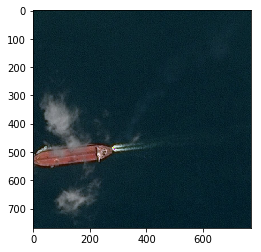

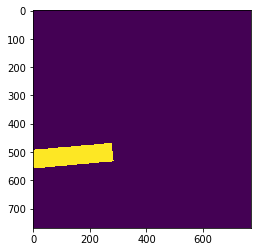

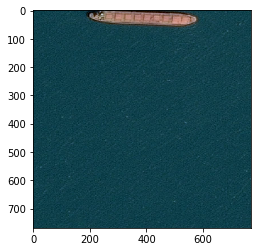

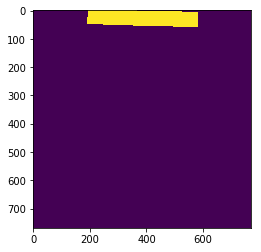

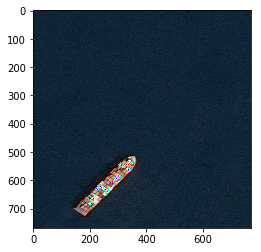

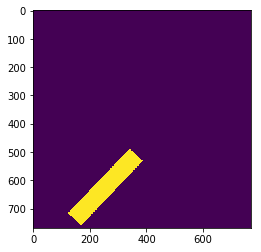

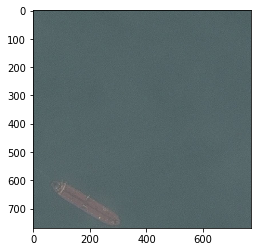

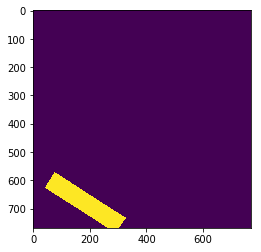

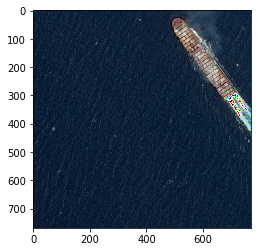

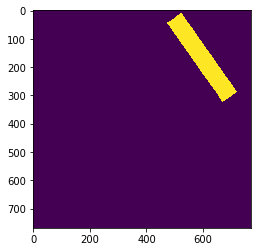

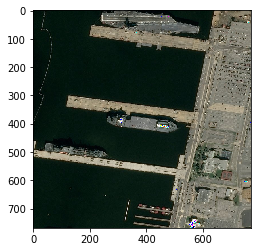

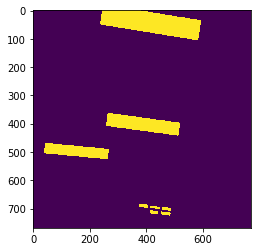

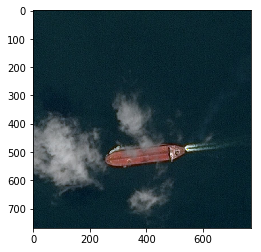

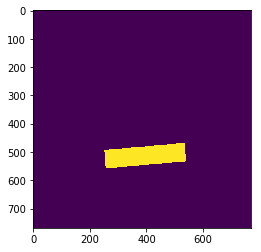

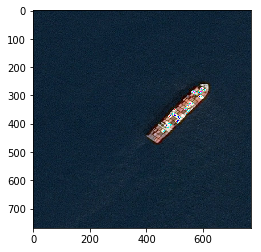

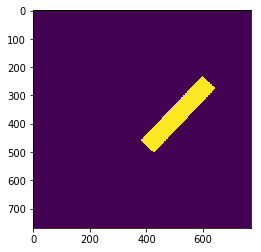

In [7]:
i, m = training[0]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    plt.imshow((i[id, :, :, :] * 256).astype(np.uint8))
    plt.show()
    plt.imshow(m[id, :].reshape((768, 768)))
    plt.show()

In [ ]:
p = model.predict(i)
for id in range(n_training_images):
    plt.imshow(p[id, :].reshape((768, 768)))
    plt.show()

In [ ]:
plt.plot(hst.history['loss'])
plt.show()